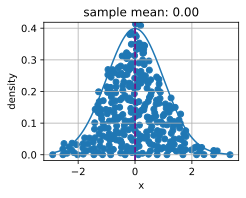

In [1]:
import torch
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)) * 2  #define pi in torch

# Sample datapoints and create y coordinate
epsilon = 0.1
torch.manual_seed(8675309)
xs = torch.randn(size=(300,))

ys = torch.tensor(
    [torch.sum(torch.exp(-(xs[:i] - xs[i])**2 / (2 * epsilon**2))\
               / torch.sqrt(2*torch.pi*epsilon**2)) / len(xs)\
     for i in range(len(xs))])

# Compute true density
xd = torch.arange(torch.min(xs), torch.max(xs), 0.01)
yd = torch.exp(-xd**2/2) / torch.sqrt(2 * torch.pi)

# Plot the results
d2l.plot(xd, yd, 'x', 'density')
d2l.plt.scatter(xs, ys)
d2l.plt.axvline(x=0)
d2l.plt.axvline(x=torch.mean(xs), linestyle='--', color='purple')
d2l.plt.title(f'sample mean: {float(torch.mean(xs).item()):.2f}')
d2l.plt.show()

In [2]:
# Statistical bias
def stat_bias(true_theta, est_theta):
    return(torch.mean(est_theta) - true_theta)

# Mean squared error
def mse(data, true_theta):
    return(torch.mean(torch.square(data - true_theta)))

theta_true = 1
sigma = 4
sample_len = 10000
samples = torch.normal(theta_true, sigma, size=(sample_len, 1))
theta_est = torch.mean(samples)
theta_est, mse(samples, theta_true)

(tensor(1.0170), tensor(16.0298))

In [3]:
bias = stat_bias(theta_true, theta_est)
torch.square(samples.std(unbiased=False)) + torch.square(bias)


tensor(16.0298)

In [4]:
# PyTorch uses Bessel's correction by default, which means the use of ddof=1
# instead of default ddof=0 in numpy. We can use unbiased=False to imitate
# ddof=0.

# Number of samples
N = 1000

# Sample dataset
samples = torch.normal(0, 1, size=(N,))

# Lookup Students's t-distribution c.d.f.
t_star = 1.96

# Construct interval
mu_hat = torch.mean(samples)
sigma_hat = samples.std(unbiased=True)
(mu_hat - t_star*sigma_hat/torch.sqrt(torch.tensor(N, dtype=torch.float32)),\
 mu_hat + t_star*sigma_hat/torch.sqrt(torch.tensor(N, dtype=torch.float32)))

(tensor(-0.0568), tensor(0.0704))